In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
import zipfile
zf = zipfile.ZipFile('archive.zip')
zf.extractall()
zf.close()

In [24]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [30]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [31]:
X_train = train_data['x'][:-1]
y_train = train_data['y'][:-1]
X_test = train_data['x'][:-1]
y_test = train_data['y'][:-1]

In [32]:
import random
import numpy as np

In [35]:
class LinearRegressor:
  def __init__(self, X_data, y_data, iterations):
    self.X = X_data
    self.y = y_data
    self.iterations = iterations
    self.l = .0001
    self.w = np.random.rand(1)*0.1
    self.b = np.random.rand(1)*0.1
    self.n = float(len(self.X))  

  def cost(self, y_pred):
    value = np.sum(np.square(self.y - y_pred))      
    cost = (value) / self.n
    return(cost)

  def MSE(self, y_pred, y):
    errors = y - y_pred #error is the difference between actual and predicted value
    mse = float(np.sum(np.square(errors)) / self.n) #mean of sum of square of erros
    return mse ** 0.5

  def fit(self):
    self.history = np.zeros(self.iterations)
    for i in range(self.iterations):
      y_pred = self.w * self.X + self.b
      error = y_pred - self.y
      gw = 2 * np.sum(error * self.X)/self.n
      gb = 2 * np.sum(error)/ self.n 
      self.w = self.w - self.l * gw
      self.b = self.b - self.l * gb
      self.history[i] = self.cost(y_pred)
    self.rmse = self.MSE(y_pred, self.y)
    print(self.rmse)


  def results(self):
    print(self.w,self.b)
    fig=plt.figure(figsize=(14,14))
    a1=fig.add_subplot(211)

    plt.title('minimisation of errors across the iterations')
    plt.plot(self.history)

    #making predictions
    a2 = fig.add_subplot(212)
    final_y = self.w * self.X +self.b 
    plt.scatter(self.X,self.y)
    plt.title('regrssion line')
    # a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
    plt.plot(self.X,final_y,color='red') #plotting the red line 
    plt.show()
              
    print ('Root Mean Squared Error=',self.rmse)

2.80783386766583
[0.99773863] [0.0927538]


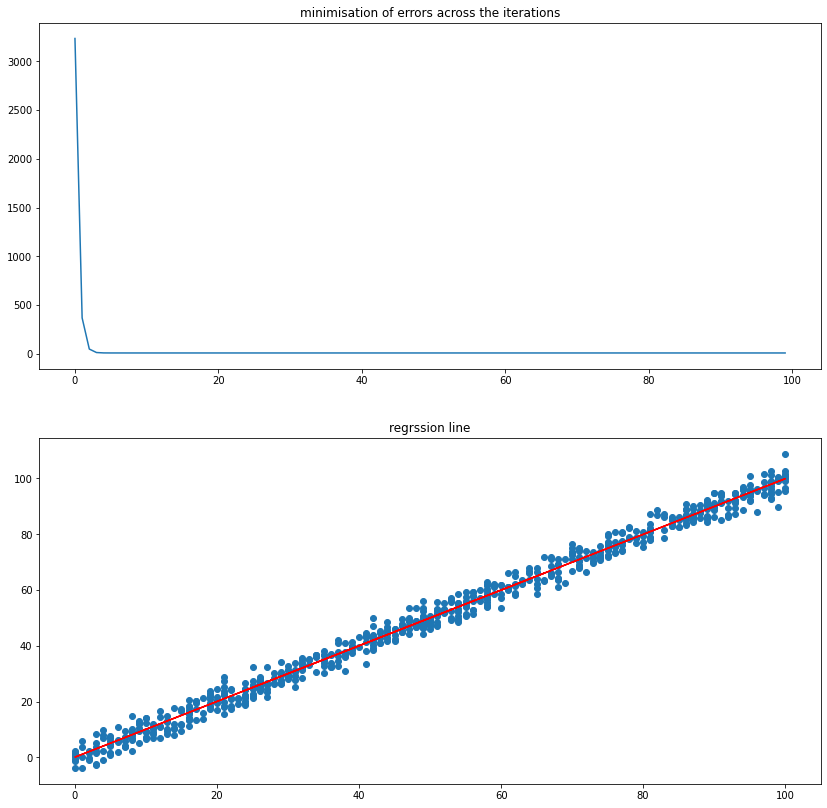

Root Mean Squared Error= 2.80783386766583


In [36]:
l = LinearRegressor(X_train, y_train, 100)
l.fit()
l.results()